# Complexité expérimentale : un exemple

En `python` les entiers sont de taille quelconque (non bornée). On va mesurer le temps nécessaire pour effectuer des sommes et des produits d'entiers, avec des nombres de taille variable, et afficher les temps d'exécution relatifs en fonction de leur tailles (mésurées par le nombre de digits en base 10).

On réalise ceci dans une fonction `test(N,repeat)` où l'on fait varier le nombre de chiffres de deux entiers `x` et `y` de `6` chiffres à `N` chiffres. On répète la somme et le produit de `x` et `y` un grand nombre de fois de fois, le nombre de répétitions étant le paramètre `repet` de la fonction, pour gommer les légères différences en temps et améliorer la précision de la mesure. On met les temps de calcul dans deux listes, `somme` et `produit`, pour les représenter graphiquement à la fin.

In [1]:
def test(N,repet):
    from timeit import default_timer as timer
    
    c = 6 # --- on va commencer avec des nombres de 6 chiffres
    x = 123456  # --- 2 entiers x et y
    y = 987654  #     de 6 chiffres
    somme = []
    produit = []
    #
    for n in range(6,N + 1): # --- on va varier le nombre de chiffres
                             #     de 6 à N
        t0 = timer()
        for h in range(repet): # --- on refait repet fois
            z = x + y
        delta = timer() - t0
        somme.append(delta)
        #
        t0 = timer()
        for h in range(repet): # --- on refait repet fois
            z = x*y
        delta = timer() - t0
        produit.append(delta)
        #
        x = 10*x + 1  # --- x et y ont un
        y = 10*y + 1  #     chiffre de plus
    return somme,produit

Dans ce qui suit, on va mesurer le temps de d'exécution de $r = 10^3$ opérations (identiques) avec chaque paire de valeurs pour `x` et `y`, dont le nombre de chiffres va varier de 6 à $N = 100$.

In [2]:
N = 100
r = 1000
s,p = test(N,r)

In [3]:
# --- on imprime les temps d'exécution pour la somme
print("\nPour la somme (n et temps d'exéc. pour n chiffres) :\n")
print("N \t     temps en secs")
print("-------------------------------")
for n in range(6,N+1):
    print(n,"\t",s[n-6])


Pour la somme (n et temps d'exéc. pour n chiffres) :

N 	     temps en secs
-------------------------------
6 	 4.814400000008323e-05
7 	 4.733300000003826e-05
8 	 4.8588000000071574e-05
9 	 4.787699999997397e-05
10 	 4.988599999999899e-05
11 	 5.012199999998579e-05
12 	 5.00549999999933e-05
13 	 4.952200000007956e-05
14 	 4.9509000000003134e-05
15 	 4.9441000000038926e-05
16 	 4.957499999991288e-05
17 	 4.940700000000131e-05
18 	 4.915800000004911e-05
19 	 5.050799999994915e-05
20 	 5.0258999999996945e-05
21 	 5.024599999992052e-05
22 	 5.0127000000066424e-05
23 	 5.060400000000964e-05
24 	 5.0289000000036665e-05
25 	 5.147000000005342e-05
26 	 5.014400000002972e-05
27 	 5.0075000000093794e-05
28 	 5.9687000000030466e-05
29 	 5.176500000003692e-05
30 	 5.2205999999999086e-05
31 	 5.0862000000040375e-05
32 	 5.0651999999984376e-05
33 	 5.084999999993567e-05
34 	 5.1307000000000436e-05
35 	 5.056700000005687e-05
36 	 5.116100000002177e-05
37 	 5.0935999999945913e-05
38 	 5.199300000002

In [4]:
# --- on imprime les temps d'exécution pour le produit
print("\nPour le produit (n et temps d'exéc. pour n chiffres) :\n")
print("N \t     temps en secs")
print("-------------------------------")
for n in range(6,N+1):
    print(n,"\t",p[n-6])


Pour le produit (n et temps d'exéc. pour n chiffres) :

N 	     temps en secs
-------------------------------
6 	 4.9151999999996754e-05
7 	 4.8949999999936544e-05
8 	 5.246199999997536e-05
9 	 5.1261999999940855e-05
10 	 7.046899999996192e-05
11 	 7.150599999994345e-05
12 	 7.025699999996249e-05
13 	 6.986900000005569e-05
14 	 6.993000000010685e-05
15 	 6.964800000008875e-05
16 	 6.995599999992663e-05
17 	 7.000999999995372e-05
18 	 6.961999999999247e-05
19 	 7.936600000002514e-05
20 	 8.026800000004997e-05
21 	 8.004999999999818e-05
22 	 8.002000000006948e-05
23 	 7.982900000003124e-05
24 	 8.081399999992911e-05
25 	 8.010000000002737e-05
26 	 8.001199999996267e-05
27 	 8.025200000005839e-05
28 	 8.422899999993572e-05
29 	 9.180799999997102e-05
30 	 9.206100000003214e-05
31 	 9.185099999997615e-05
32 	 9.197699999996534e-05
33 	 9.210500000000899e-05
34 	 9.239999999999249e-05
35 	 9.221999999997621e-05
36 	 9.135999999998479e-05
37 	 9.611999999992182e-05
38 	 0.0001117170000000111

On affiche maintenant les résultats dans deux courbes.

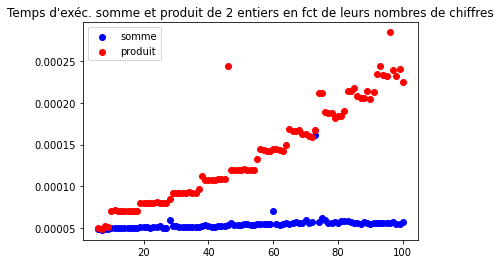

In [5]:
import matplotlib.pyplot as plt
x = [n for n in range(6,N+1)]
plt.scatter(x, s, c = 'blue',label = "somme")
plt.scatter(x, p, c = 'red',label = "produit")
plt.legend()
plt.title("Temps d'exéc. somme et produit de 2 entiers en fct de leurs nombres de chiffres")
plt.show()

On refait mais en répétant $10^6$ fois les opérations (sans imprimer les listes, maintenant).

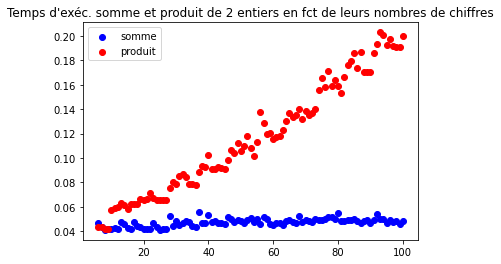

In [6]:
N = 100
r = 1000000
s,p = test(N,r)

import matplotlib.pyplot as plt

x = [n for n in range(6,N+1)]
plt.scatter(x, s, c = 'blue',label = "somme")
plt.scatter(x, p, c = 'red',label = "produit")
plt.legend()
plt.title("Temps d'exéc. somme et produit de 2 entiers en fct de leurs nombres de chiffres")
plt.show()